*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

IndexError: index 84 is out of bounds for axis 0 with size 84

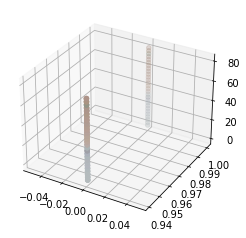

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from time import time

#############################
# Hit Test Run to Visualize #
#############################

# Read in the image and depth map as seperate assets
image_location = '1.png'
depth_map_location = '2.png'

# Load in the images
depth_map = mpimg.imread(depth_map_location)
image = mpimg.imread(image_location)

start_time = time()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
rows= depth_map.shape[0]
cols = depth_map.shape[1]

# Send pixels not correctly mapped to the back
max_val = depth_map.max() * 1.1

count = 0

# Cut down pixels for time purpose 
# Computations need to be under 30s
pixel_cut = 3 
      
# Iterate thorugh all the pixels       
for x in range(cols):
    for y in range(rows):
        if (x % pixel_cut == 0 and y % pixel_cut == 0):
            
            # Count points done
            count+=1
            
            # Get point color for pixel
            pixel_color = (image[y,x,0],image[y,x,1],image[y,x,2])
            
            # Get point depth for each particle
            depth = depth_map[y,x]
            
            # Send points not correctly mapped to the back
            if depth.any() == 0:
                depth = max_val
                
            ax.scatter(x, depth, y, c = pixel_color, marker='o')

# Axis Labels
ax.set_xlabel('Width')
ax.set_ylabel('Depth')
ax.set_zlabel('Height')

plt.gca().invert_zaxis()

###########################################
# Play with me to change view rotation!
elevation = 30 # Up/Down
azimuth = 300 # Left/Right
###########################################


ax.view_init(elevation, azimuth)

plt.show() # Uncomment if running on your local machine
print ("Outputted {} of the {} points".format(count,6552))
print ("Results produced in {:04.2f} seconds".format(time()-start_time))